In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_json('yelp_academic_dataset_business.json',lines=True)

In [3]:
df_business = df

In [4]:
df_business['cat_list'] = [x.split(',') if x else [''] for x in df_business['categories']]
all_cat = list(df_business['cat_list'])

In [5]:
unique_cat = set(np.concatenate(all_cat))
unique_cat = [x.replace(' ', '') for x in unique_cat] # length = 2455

In [6]:
def give_unique_cat(cat_list: list):
    cat_list = [x.replace(' ', '') for x in cat_list]
    unique_category = 'Others'
    if 'Restaurants' in cat_list or 'Food' in cat_list or 'Cafeteria' in cat_list: 
        unique_category = 'Food'
    if 'Hotel&Travel' in cat_list or 'Hotels' in cat_list : 
        unique_category = 'Hotels'
    if 'Bars' in cat_list or 'Beer' in cat_list: 
        unique_category = 'Bars'
    # if 'Cafeteria' in cat_list: 
    #     unique_category = 'Cafeteria'
    if 'Pharmacy' in cat_list or 'Doctors' in cat_list or 'Health&Medical' in cat_list: 
        unique_category = 'Health & Medical'
    if 'Shopping' in cat_list: 
        unique_category = 'Shopping'
    if 'Arts&Entertainment' in cat_list: 
        unique_category = 'Arts & Entertainment'
    if 'Financial Services' in cat_list: 
        unique_category = 'Financial Services'
    if 'Automotive' in cat_list: 
        unique_category = 'Automotive'
    if 'ActiveLife' in cat_list: 
        unique_category = 'Active Life'

    return unique_category

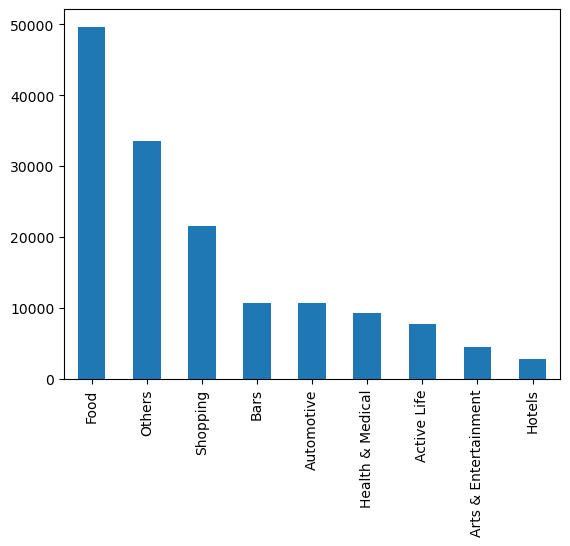

In [7]:
df_business['unique_category'] = [give_unique_cat(x) for x in df_business['cat_list']]
df_business['unique_category'].value_counts().plot(kind='bar')

In [8]:
def give_restaurant_type(cat_list: list):
    restaurant_type = None
    cat_list = [x.replace(' ', '') for x in cat_list]
    if not ('Food' in cat_list or 'Restaurants' in cat_list):
        return restaurant_type

    # print(cat_list)

    if 'Korean' in cat_list:
        restaurant_type = 'Korean'
    elif 'Italian' in cat_list:
        restaurant_type = 'Italian'
    elif 'Pizza' in cat_list or 'FastFood' in cat_list or 'Burgers' in cat_list:
        restaurant_type = 'Fast Food'
    elif 'Japanese' in cat_list:
        restaurant_type = 'Japanese'
    elif 'American(Traditional)' in cat_list or 'American(New)' in cat_list:
        restaurant_type = 'American'
    elif 'Chinese' in cat_list:
        restaurant_type = 'Chinese'
    elif 'Mexican' in cat_list:
        restaurant_type = 'Mexican'
    elif 'Vietnamese' in cat_list:
        restaurant_type = 'Vietnamese'
    else:
        restaurant_type = 'Others'

    return restaurant_type

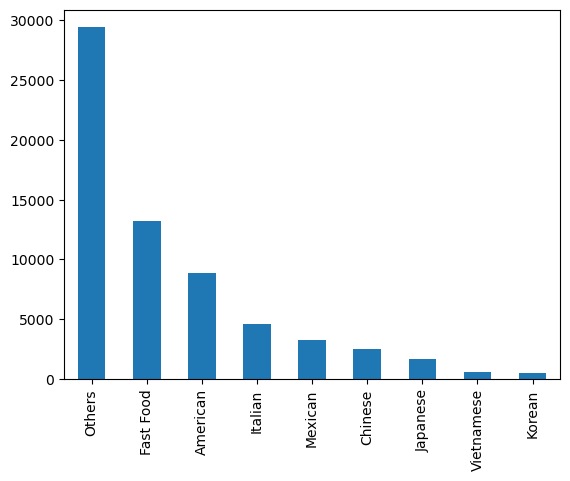

In [9]:
df_business['restaurant_type'] = [give_restaurant_type(x) for x in df_business['cat_list']]
df_business['restaurant_type'].value_counts().plot(kind='bar')

In [10]:
def check_attribute(attribute: dict, key: str):
    if not attribute:
        return False

    v = attribute.get(key)
    if key == 'BusinessParking':
        if v:
            v = 'True' in v
        else:
            v = 'False'

    if v and v != 'False' and v!= 'None': 
        return True
    else:
        return False

df_business['has_wifi'] = [check_attribute(x, 'WiFi') for x in df_business['attributes']]
df_business['has_parking'] = [check_attribute(x, 'BusinessParking') for x in df_business['attributes']]
df_business['animal_friendly'] = [check_attribute(x, 'DogsAllowed') for x in df_business['attributes']]

In [11]:
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,cat_list,unique_category,restaurant_type,has_wifi,has_parking,animal_friendly
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,"[Doctors, Traditional Chinese Medicine, Natu...",Health & Medical,None,False,False,False
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...","[Shipping Centers, Local Services, Notaries,...",Others,None,False,False,False
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...","[Department Stores, Shopping, Fashion, Home...",Shopping,None,True,True,False
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...","[Restaurants, Food, Bubble Tea, Coffee & Te...",Food,Others,True,True,False
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...","[Brewpubs, Breweries, Food]",Food,Others,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3...","[Nail Salons, Beauty & Spas]",Others,None,False,False,False
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3...","[Pets, Nurseries & Gardening, Pet Stores, H...",Shopping,None,True,True,False
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None,"[Shopping, Jewelry, Piercing, Toy Stores, ...",Shopping,None,False,False,False
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...","[Fitness/Exercise Equipment, Eyewear & Optici...",Shopping,None,False,True,False


In [12]:
def calTime(hours, day):
    if hours:
        if day in hours:
            time = hours[day]
            times = time.split('-')
            times1 = times[0].split(':')
            times2 = times[1].split(':')
            if int(times1[0]) == int(times2[0]):
                hour = 24
            else:
                hour = int(times2[0]) - int(times1[0])
            min = int(times2[1]) - int(times1[1])
            min /= 60
            return int(hour - min)

In [13]:
df_business['Monday'] = df_business.apply(lambda x : calTime(x['hours'],'Monday'),axis = 1)
df_business['Tuesday'] = df_business.apply(lambda x : calTime(x['hours'],'Tuesday'),axis = 1)
df_business['Wednesday'] = df_business.apply(lambda x : calTime(x['hours'],'Wednesday'),axis = 1)
df_business['Thursday'] = df_business.apply(lambda x : calTime(x['hours'],'Thursday'),axis = 1)
df_business['Friday'] = df_business.apply(lambda x : calTime(x['hours'],'Friday'),axis = 1)
df_business['Saturday'] = df_business.apply(lambda x : calTime(x['hours'],'Saturday'),axis = 1)
df_business['Sunday'] = df_business.apply(lambda x : calTime(x['hours'],'Sunday'),axis = 1)

In [14]:
df_business['hours']

0                                                      None
1         {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...
2         {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...
3         {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...
4         {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...
                                ...                        
150341    {'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3...
150342    {'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3...
150343                                                 None
150344    {'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...
150345    {'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...
Name: hours, Length: 150346, dtype: object

In [15]:
df_IL = df_business[df_business['state'] == 'IL'].reset_index(drop=True)
df_IL.to_json('yelp_academic_dataset_business_IL.json')

In [17]:
df_IN = df_business[df_business['state'] == 'IN'].reset_index(drop=True)
df_IN.to_json('yelp_academic_dataset_business_IN.json')

In [18]:
df_PA = df_business[df_business['state'] == 'PA'].reset_index(drop=True)
df_PA.to_json('yelp_academic_dataset_business_PA.json')